In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Let's look at the California Housing dataset

Let's look at the California Housing dataset. This has averages on the level of blocks in California. The goal is to predict the avg values of the houses on a block in a region given e.g. the average number of bedrooms summed over blocks in the region. This includes e.g. the population of the block and the occupancy of the houses. Those are very different numbers  


In [2]:
# Load the California Housing dataset
california = fetch_california_housing()
X, y = california.data, california.target


# Create a pandas DataFrame from the data
df = pd.DataFrame(X, columns=california.feature_names)
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


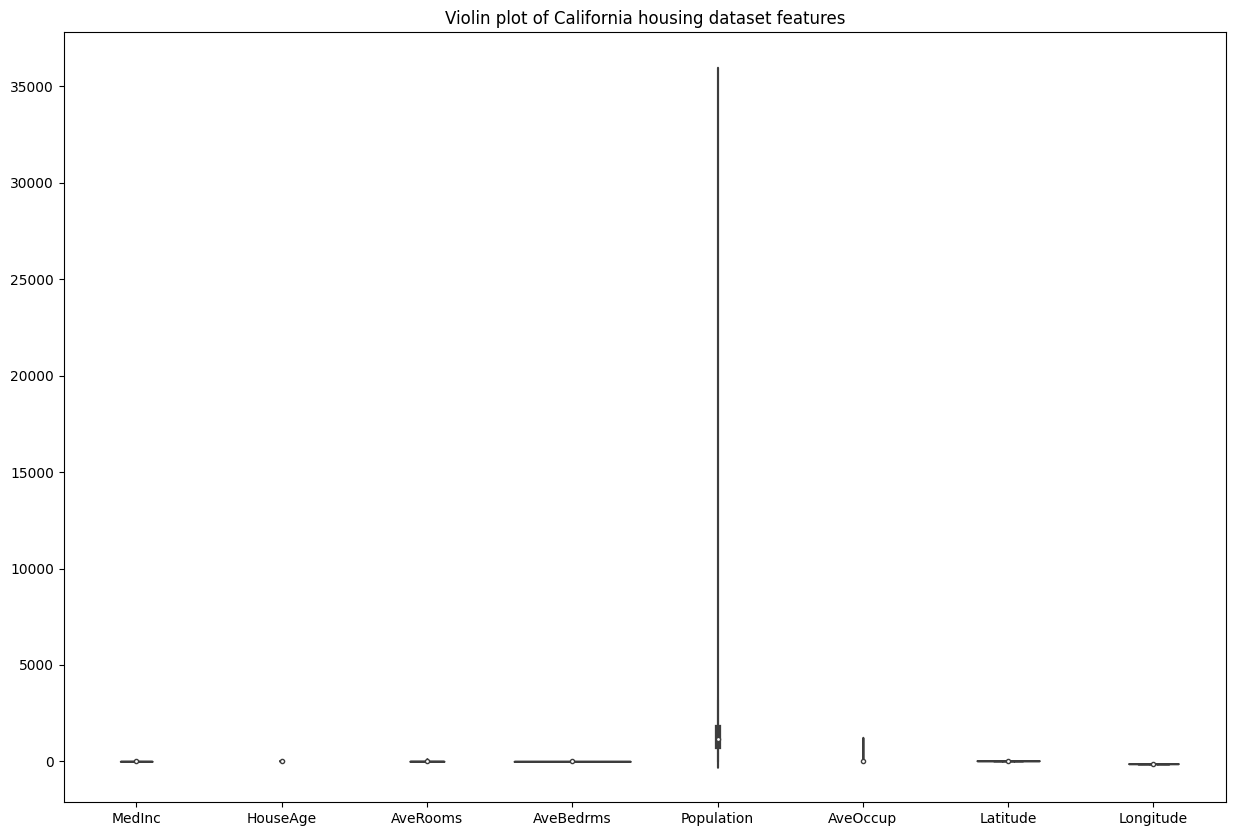

In [5]:
import seaborn as sns

# Continue from the previous code

# Create a violin plot for each feature
plt.figure(figsize=(15,10))
sns.violinplot(data=df)
plt.title('Violin plot of California housing dataset features')
plt.show()

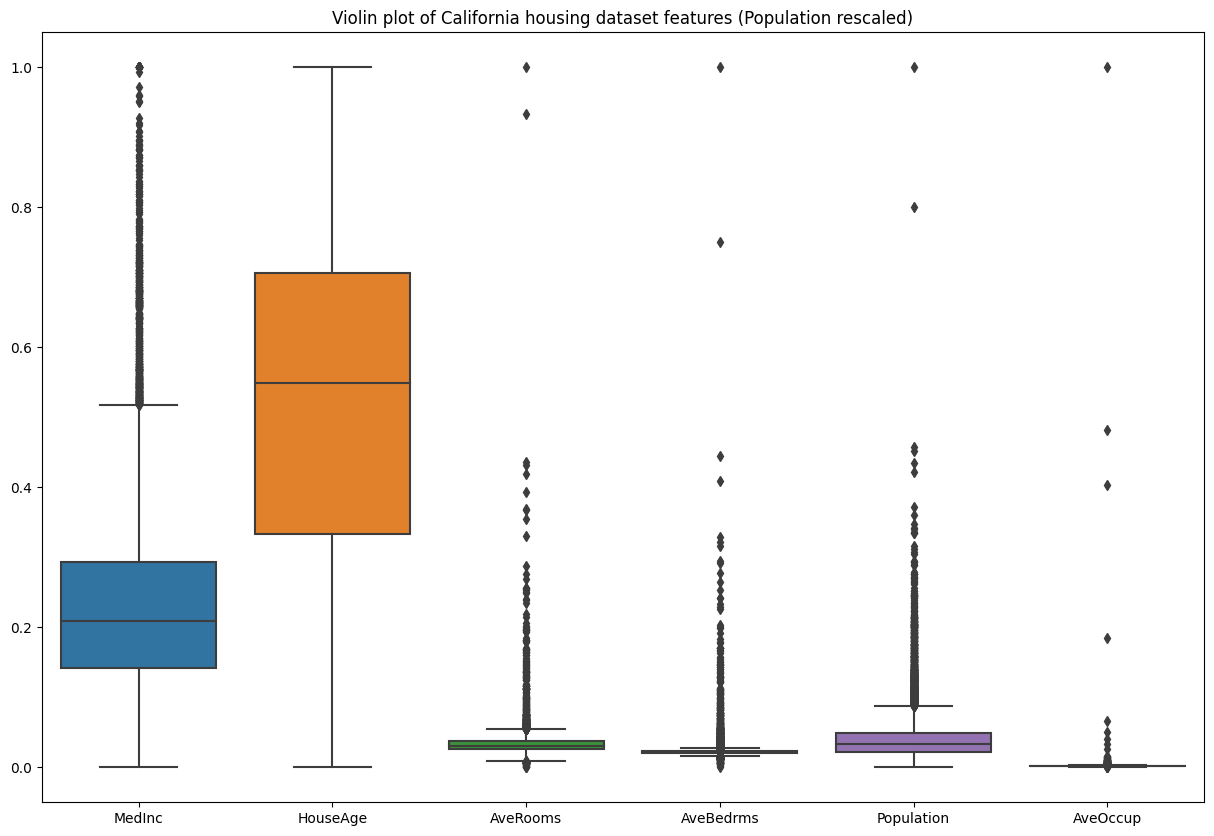

In [6]:

# Select features to scale
features_to_scale = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Rescale selected features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Create a violin plot for each feature
plt.figure(figsize=(15,10))
sns.boxplot(data=df[features_to_scale])
plt.title('Violin plot of California housing dataset features (Population rescaled)')
plt.show()

In [ ]:
# In the past, I would have used the boston dataset. Look what happens now
from sklearn.datasets import load_boston

# Let's do some predictions using kNN on the California data

## If we don't scale it, it still works very well. But if we do scale it, it works even better

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize and train a KNN model on the unscaled data
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = knn.predict(X_test)
mse_unscaled = mean_squared_error(y_test, y_pred, squared=False)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN model on the scaled data
knn_scaled = KNeighborsRegressor(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred_scaled = knn_scaled.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled, squared=False)

print('MSE of unscaled KNN:', mse_unscaled)
print('MSE of scaled KNN:', mse_scaled)


MSE of unscaled KNN: 1.0626100356270716
MSE of scaled KNN: 0.6464140550979446
